<a href="https://colab.research.google.com/github/medeirosleandro/portifolio_data_science/blob/main/WordCloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Criando WordCloud usando Python

###Base de dados usada nos experimento, coletada no [Portal Airbnb](http://insideairbnb.com/get-the-data.html) 

O objetivo é criar uma nuvem de palavras, usando a biblioteca [Wordcloud](https://amueller.github.io/word_cloud/), com base nas palavras mais usadas pelos clientes ao fazer a avalição, em Hospedagens no Estado do Rio de Janeiro.

In [ ]:
#instalar wordcloud
!pip install wordcloud -q

In [ ]:
#importando pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import  WordCloud, STOPWORDS, ImageColorGenerator

In [ ]:
DATA_PATH = "http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-05-24/data/listings.csv.gz"

#importar o arquivo csv em um DataFrame

df = pd.read_csv(DATA_PATH)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (61,62,94) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
# visualizar as 5 primeiras entradas

df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,17878,https://www.airbnb.com/rooms/17878,20200524171540,2020-05-25,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",Discounts for long term stays. Please contact ...,"- Beautiful, sunny 2 bedroom (90 square meters...",Discounts for long term stays. Please contact ...,none,This is the one of the bests spots in Rio. Bec...,NaN,Excellent location. Close to all major attract...,The entire apartment is yours. It's like your ...,I will be available throughout your stay shoul...,Please leave the apartment in a clean fashion ...,NaN,NaN,https://a0.muscache.com/im/pictures/65320518/3...,NaN,68997,https://www.airbnb.com/users/show/68997,Matthias,2010-01-08,"Rio de Janeiro, State of Rio de Janeiro, Brazil",I am a journalist/writer. Lived for 15 years...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/67b13...,https://a0.muscache.com/im/pictures/user/67b13...,Copacabana,2.0,2.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Rio de Janeiro, Rio de Janeiro, Brazil",Copacabana,Copacabana,...,$0.00,7,180,7,7,1125,1125,7.0,1125.0,3 months ago,t,23,53,83,335,2020-05-25,251,23,2010-07-15,2020-04-06,93.0,9.0,10.0,10.0,10.0,10.0,9.0,f,NaN,NaN,t,f,moderate,f,f,1,1,0,0,2.09
1,21280,https://www.airbnb.com/rooms/21280,20200524171540,2020-05-25,Renovated Modern Apt. Near Beach,Immaculately renovated top-floor apartment ove...,Immaculately renovated top-floor apartment in ...,Immaculately renovated top-floor apartment ove...,none,This is the best neighborhood in Zona Sul. Fo...,NaN,The new metro station is just a few steps away...,"This is an older ""Art Deco"" style building, so...",Someone will be there at check in and check ou...,This is a booking agreement for rental of a tw...,NaN,NaN,https://a0.muscache.com/im/pictures/60851312/b...,NaN,81163,https://www.airbnb.com/users/show/81163,Jules,2010-02-14,"Chicago, Illinois, United States",Hi I am Jules and I have a beautiful apartment...,within a few hours,100%,90%,f,https://a0.muscache.com/im/users/81163/profile...,https://a0.muscache.com/im/users/81163/profile...,Ipanema,0.0,0.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Rio de Janeiro, RJ, Brazil",Ipanema,Ipanema,...,$0.00,5,30,5,5,30,30,5.0,30.0,3 months ago,t,30,60,90,90,2020-05-25,94,6,2014-02-14,2020-03-22,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,1.23
2,25026,https://www.airbnb.com/rooms/25026,20200524171540,2020-05-25,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renov

In [ ]:
# verificar quantidade de valores ausentes
print("Valores ausentes na coluna summary: ", df.summary.isnull().sum())

# eliminar os valores ausentes da coluna summary
summary = df.dropna(subset=['summary'], axis=0)['summary']

Valores ausentes na coluna summary:  2577


In [ ]:
# concatenar as palavras

all_summary = " ".join(s for s in summary)
print("Quantidade de Palavras: {}".format(len(all_summary)))

Quantidade de Palavras: 10003725


##STOPWORDS
Stopwords são, basicamente, palavras que devem ser removidas da wordcloud por não agregarem nenhuma informação (mas que aparecem muito). Alguns exemplos são “a”, “não”, “mas”, “and”, “I”, “not”, entre outras.

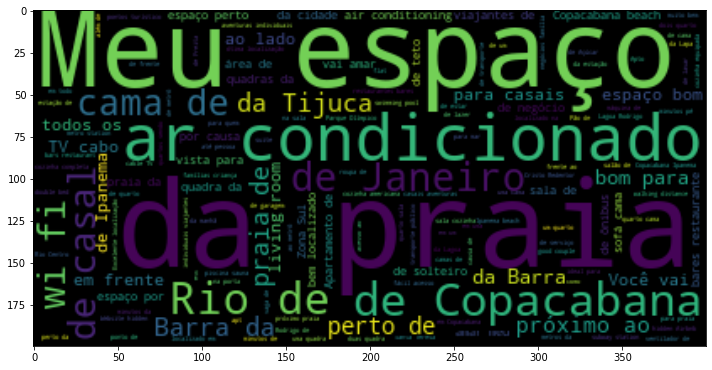

In [ ]:
# lista de stopWords

stopwords = set(STOPWORDS)

# gerar WordCloud

wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black").generate(all_summary)

# mostrar a imagem final

fig, ax = plt.subplots(figsize = (10,6))
ax.imshow(wordcloud, interpolation='bilinear')

plt.tight_layout()

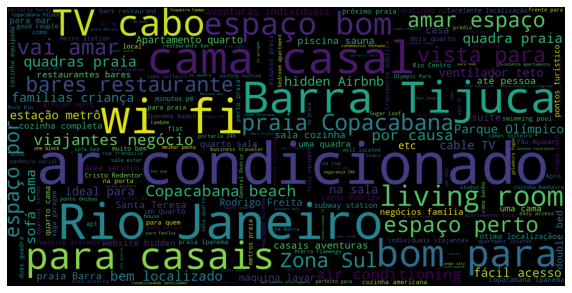

In [ ]:
# Algumas palavras como "da" e "meu" estão destacadas, elas não acrescentam informação relevante, abaixo uma nova limpeza

# lista de stopwords
stopwords = set(STOPWORDS)
stopwords.update(['da','meu','em','você','de','ao','os'])

#gerar uma wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color='black',
                      width=1600, height=800).generate(all_summary)

#mostrar a imagem final

fig, ax = plt.subplots(figsize=(10,6))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()
plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png")

##USAR IMAGENS PARA DAR UM EFEITO LEGAL NA ANÁLISE.

O wordcloud analisa as intensidades dos pixels e considera o que está em preto como área para desenhar as palavras. A imagem abaixo foi importada para o Colab. 


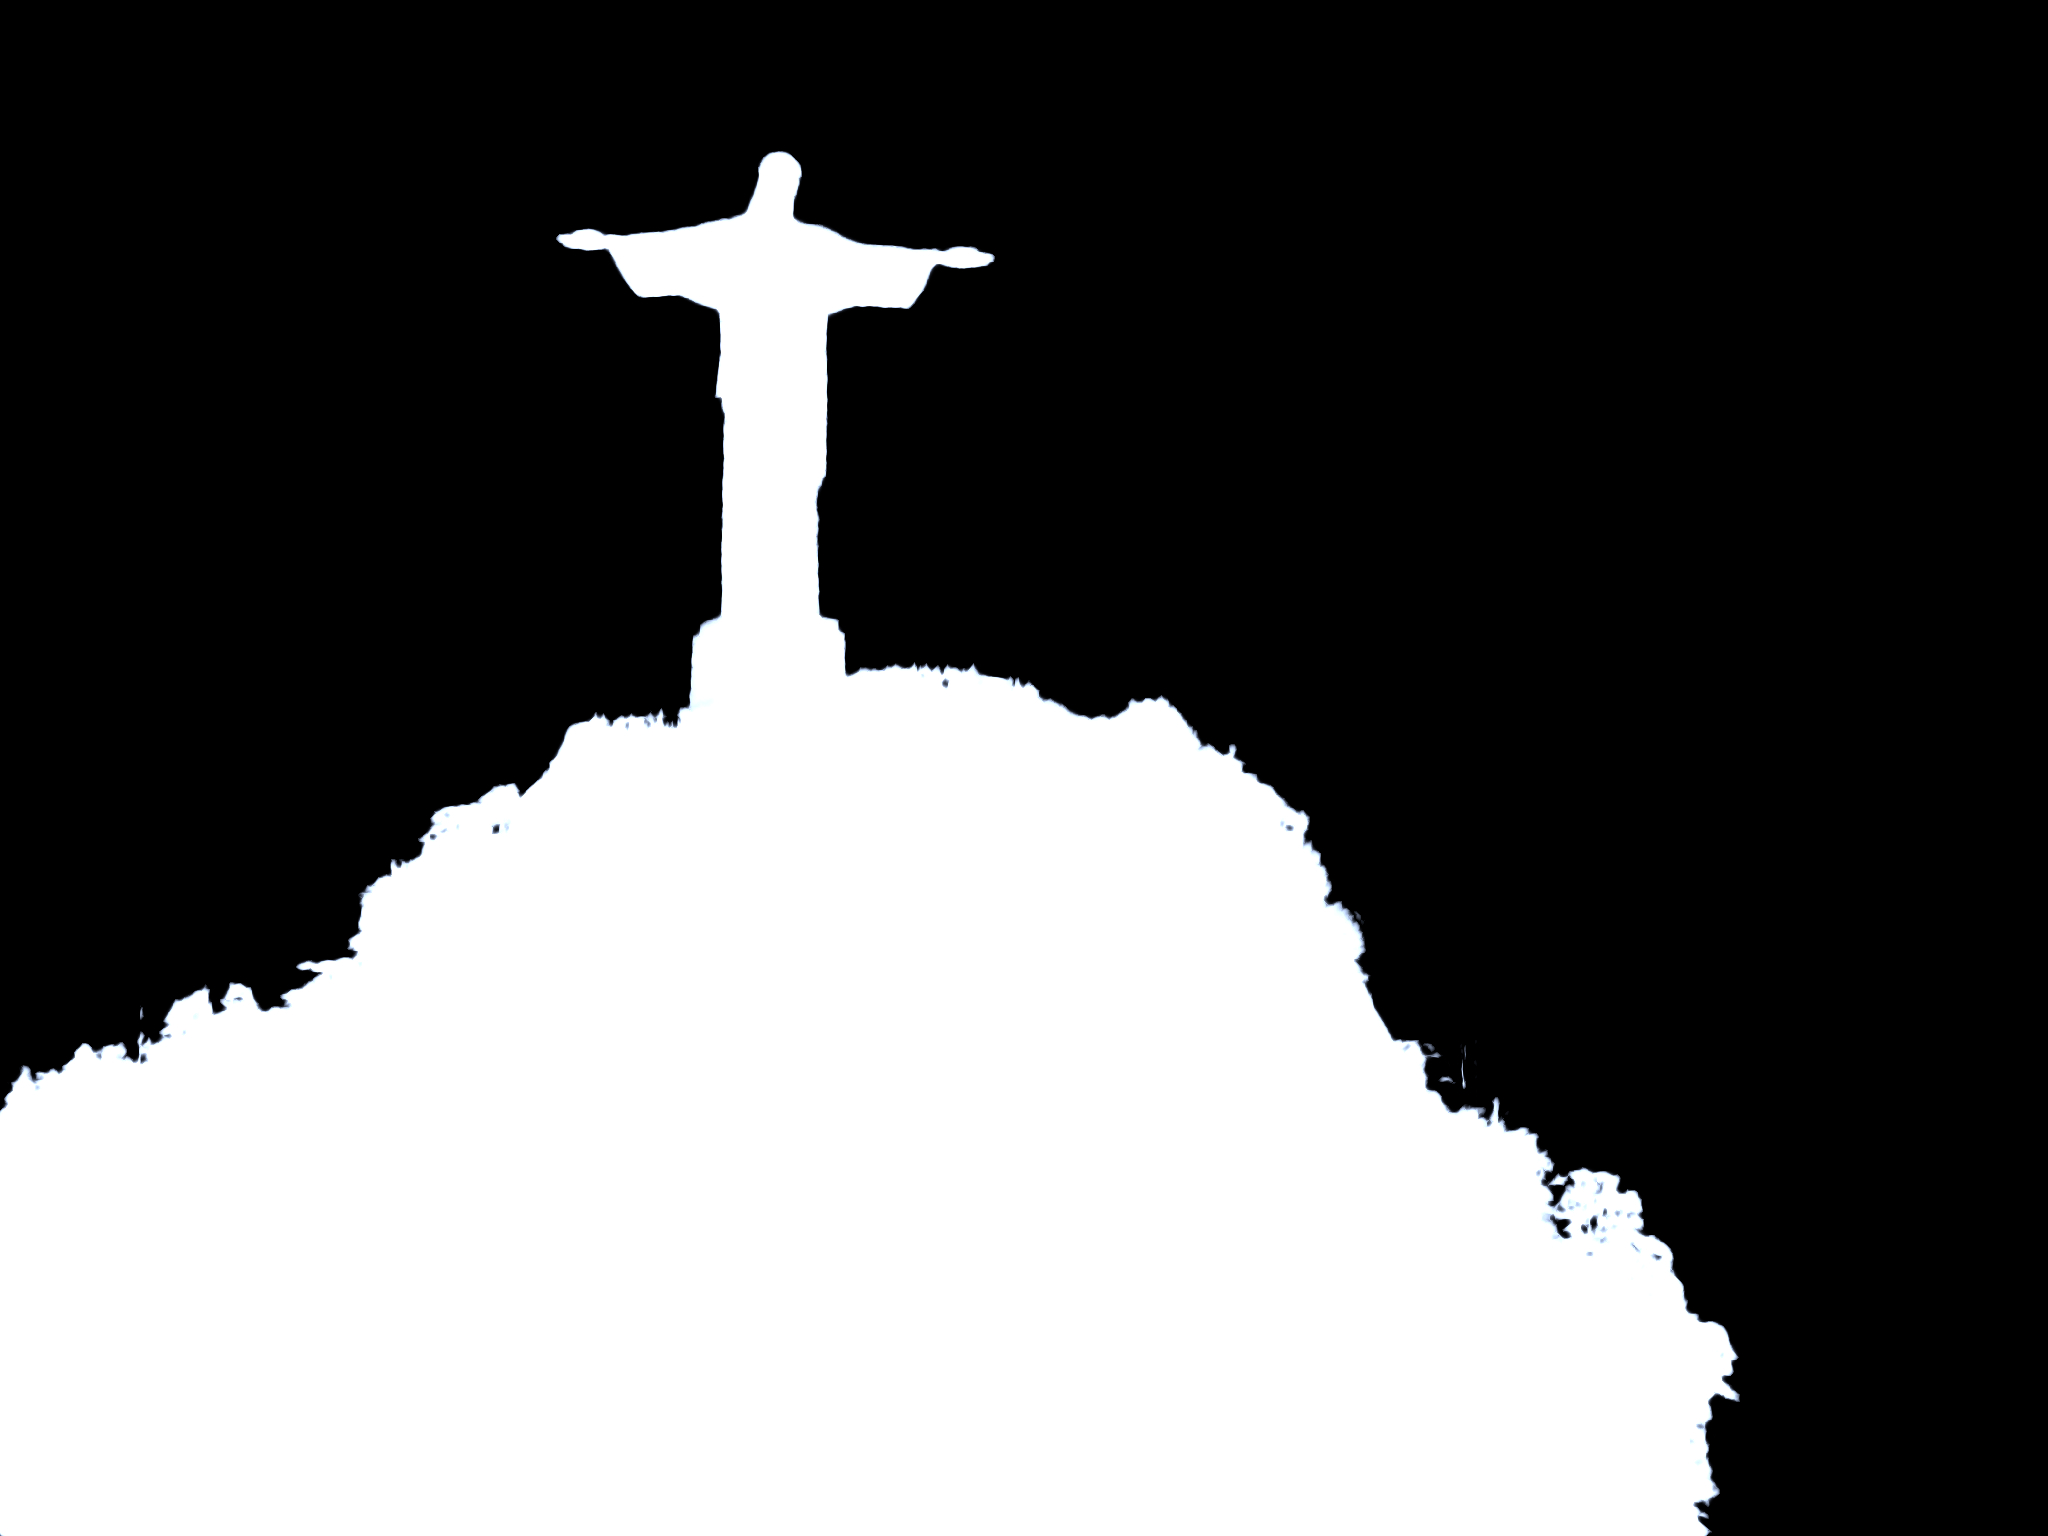

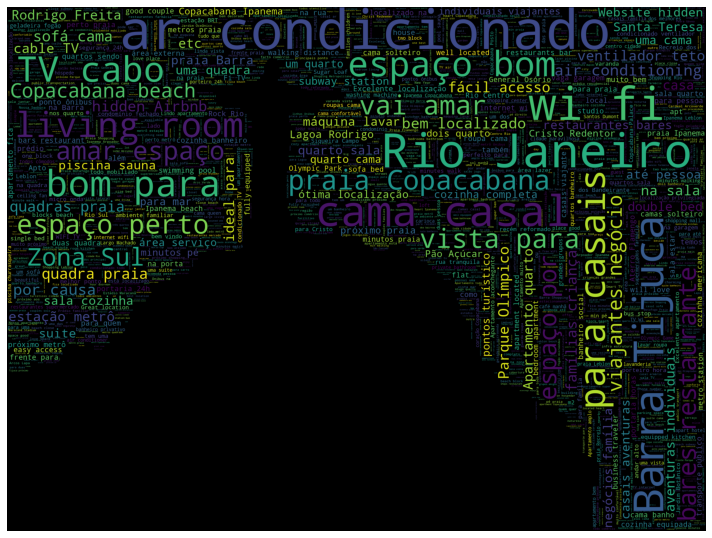

In [ ]:
#Inserir máscara na imagem usando endereço LOCAL

rio_mask = np.array(Image.open("/content/cristo24.jpg"))

#gerar wordcloud
wordcloud = WordCloud(stopwords=stopwords,
                      background_color="black",
                      width=1000, height=1000, max_words=2000,
                      mask=rio_mask, max_font_size=200, 
                      min_font_size=1).generate(all_summary)

# mostrar imagem final com máscara aplicada

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud)
wordcloud.to_file("airbnb_summary_wordcloud.png")
plt.tight_layout()

##CONCLUSÃO:

O fato de Python possuir inúmeras bibliotecas, possibilita abordagens fora da caixa como essa, que geram um impacto visual as análises. A biblioteca [Wordcloud](https://amueller.github.io/word_cloud/) abre um leque de usos e customizações, como: fonte, tamanho da fonte, cor de fundo, quantidade máxima de palavras, cor de fundo, uso de imagens e etc.